<a href="https://colab.research.google.com/github/baricio00/Health-Informatics-2025-26/blob/main/Copy_of_Lab_II_SMHD_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<font size="6">Statistical Models for Healthcare Data</font>**

**<font size="5">MSc in Health Informatics - UniSR - A.Y. 2025-2026</font>**

Prof. Lara Cavinato - Dott. Vittorio Torri

---

<font size="4">Lab II - Statistical Tests and Confidence Intervals</font>

# Dataset

Same as Lab I

Modified version of the dataset published in https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0181001

Data about 299 heart failure patients who were admitted to Institute of Cardiology and Allied hospital Faisalabad-Pakistan during April-December 2015.

**Dataset variables**

Age : age (years)

anaemia : Decrease of red blood cells or hemoglobin (boolean)

creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)

diabetes : If the patient has diabetes (boolean)

ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure : If the patient has hypertension (boolean)

platelets : Platelets in the blood (kiloplatelets/mL)

serum_creatinine : Level of serum creatinine in the blood (mg/dL)

serum_sodium : Level of serum sodium in the blood (mEq/L)

sex : Woman or man (binary)

smoking : If the patient smokes or not (boolean)

bmi: body mass index (float)

time : Follow-up period (days)

DEATH_EVENT : If the patient deceased during the follow-up period (boolean)

# Libraries

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import statsmodels.api as sm

In [5]:
import scipy.stats as st

# Load dataset

In [6]:
df = pd.read_csv('heartFailureClinicalRecordsDatasetSmhd.csv')

In [7]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,bmi
0,75.0000,0,582,0,20.7272,1,265000.0000,1.9000,138.3863,Male,0,4,True,30.8185
1,55.0000,0,7861,0,29.0182,0,263358.0300,1.1000,131.8973,Male,0,6,True,25.4027
2,65.0000,0,146,0,26.2438,0,162000.0000,1.3000,143.6583,Male,1,7,True,29.4451
3,50.0000,1,111,0,10.2077,0,210000.0000,1.9000,135.0283,Male,0,7,True,36.0610
4,65.0000,1,160,1,19.3317,0,327000.0000,2.7000,136.0836,Female,0,8,True,33.6907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0000,0,61,1,38.0483,1,155000.0000,1.1000,135.5766,Male,1,270,False,25.6041
295,55.0000,0,1820,0,35.2003,0,270000.0000,1.2000,142.0173,Female,0,271,False,29.3865
296,45.0000,0,2060,1,62.3155,0,742000.0000,0.8000,136.3808,Female,0,278,False,20.7074
297,45.0000,0,2413,0,37.4891,0,140000.0000,1.4000,133.9140,Male,1,280,False,27.7568


In [8]:
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure',  'sex',  'smoking',  'DEATH_EVENT']
num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'bmi', 'time']

# Statistical Tests & CI

A **statistical test** lets us check if the data provide enough evidence to reject a null hypothesis ($H_0$) in favor of an alternative hypothesis ($H_1$).

The two hypotheses are not symmetric:

* We can reject $H_0$ (strong conclusion).

* Or we fail to reject $H_0$ (weak conclusion — we don’t prove $H_0$, we just don’t have enough evidence against it).

Parametric tests (e.g. t-test) assume something about the data distribution (like normality) and are usually more powerful.

Non-parametric tests (e.g. Mann–Whitney) make fewer assumptions but may be less sensitive.

A test is based on a test statistic. If it falls in the critical region (defined by the significance level $\alpha$), we reject $H_0$.

The p-value is the smallest $\alpha$ for which $H_0$ would be rejected.


*   Very small p ($<1\%$) → strong evidence against $H_0$.
*   Very large p ($>10\%$) → clear evidence that $H_0$ cannot be rejected.
*   In between → depends on the chosen $\alpha$. Ususally thresholds are defined







A **Confidence Interval (CI)** gives a range of plausible values for a parameter (mean, proportion, difference).  
A *95% CI* means that if we repeated sampling many times, ~95% of the intervals would contain the true value.  
It's not just a point estimate, but an interval.

- Narrow CI → precise estimate (large n, low variability).  
- Wide CI → more uncertainty (small n, high variability).  

Types:  
  - Two-sided: (l₁, l₂)  
  - One-sided right: (l₁, +∞)  
  - One-sided left: (−∞, l₂)  

**Test**: “Is the data consistent with H₀?”  
**CI**: “What values of the parameter are consistent with the data?”  
They are connected:  
  - If the **null value** lies **outside** the CI → reject H₀.  
  - If the null value is **inside** the CI → fail to reject H₀.

# Normality Test

**Shapiro-Wilk test**

This is a test to verify if the data follow a gaussian distribution, which is a requirement for many parametrics tests (at least with small sample sizes).

$H_0:$ data are gaussian vs $H_1:$ data are not gaussian

--> if p-value is high (> 0.05) we can assume it is gaussian, despite this is a weak conclusion



In [ ]:
from scipy.stats import shapiro

shapiro_results = []

for n in num_vars:
  _, p_all = shapiro(df[n])
  _, p_dead = shapiro(df[df.DEATH_EVENT][n])
  _, p_alive = shapiro(df[~df.DEATH_EVENT][n])
  shapiro_results.append({'var': n, 'p_all': p_all, 'p_dead': p_dead, 'p_alive': p_alive})

shapiro_results = pd.DataFrame(shapiro_results)
shapiro_results

,var,p_all,p_dead,p_alive
0,age,0.0001,0.0221,0.0048
1,creatinine_phosphokinase,0.0000,0.0000,0.0000
2,ejection_fraction,0.0000,0.0007,0.0001
3,platelets,0.0000,0.0336,0.0000
4,serum_creatinine,0.0000,0.0000,0.0000
5,serum_sodium,0.5951,0.6816,0.6878
6,bmi,0.0000,0.0577,0.0000
7,time,0.0000,0.0000,0.0000


(When results don't seem to be Gaussian) Another method to verify normality are **qqplots**. This is a graphical method that plot the sample quantiles of the data against those of a gaussian distribution. If they are on a straight line that you can assume they are gaussian, if they clearly deviates you can assume they are not gaussian.


With large n the Shapiro-Wilk test might easily reject its null hyphothesis, but you might not want to reject it if you observe only a small deviation in the QQ-plot.

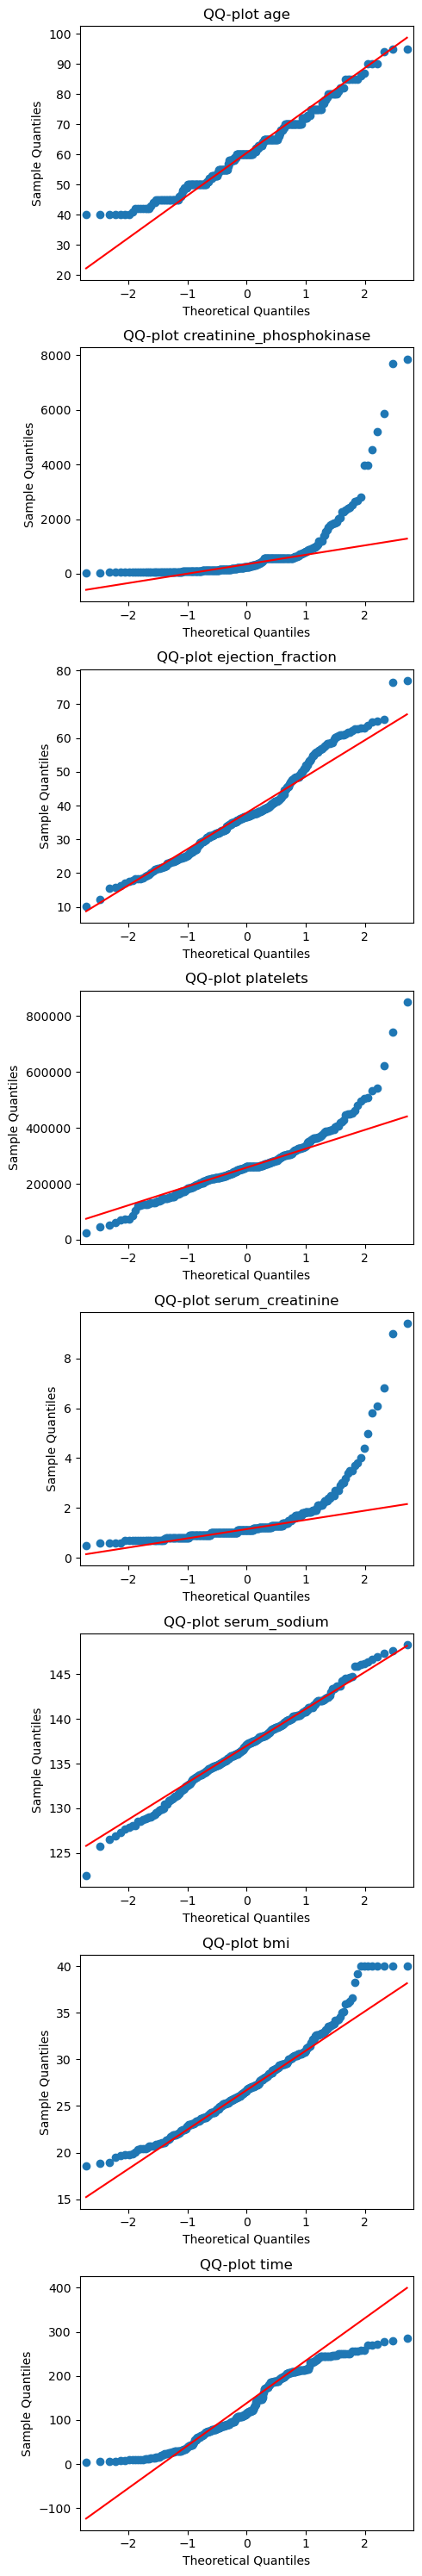

In [10]:
fig, axs = plt.subplots(len(num_vars), figsize=(5,30))

for (i,v) in enumerate(num_vars):
  sm.qqplot(df[v], line='q', ax=axs[i])
  axs[i].set_title('QQ-plot ' + v)
plt.tight_layout()

# Mean 1 population

## t-Test

Example: *Is there any evidence that the mean of serum sodium is different from 140 (the average value for an healthy adult)?*

Test the mean of a gaussian population with variance unknown: **1 sample t-test**

Requirement: gaussian population (already verified)

$H_0: \mu = 140 $ vs $H_1: \mu \neq 140$

**If the p-value is very small, we reject the null hypotheses**


In [11]:
st.ttest_1samp(df['serum_sodium'], 140, alternative='two-sided') # less, greater

TtestResult(statistic=np.float64(-12.522519891018284), pvalue=np.float64(3.420089243850152e-29), df=np.int64(298))

In [12]:
res = st.ttest_1samp(df['serum_sodium'], 140, alternative='two-sided')
res.pvalue # to access the p-value

np.float64(3.420089243850152e-29)

In [13]:
if res.pvalue < 0.05:
    print("Reject H0: mean serum sodium is significantly different from 140.")
else:
    print("Fail to reject H0: no evidence mean differs from 140.")

Reject H0: mean serum sodium is significantly different from 140.


P-value is estremely low --> we can reject the null hypthoses

N.B. if the sample size is large (> 30) the test works in an approximate way also if the sample is not gaussian

## t C.I.

Example: *Compute a 95% bilateral confidence interval for the mean of serum sodium*

Bilateral C.I. for the mean of a gaussian population with variance unknown: **1 sample bilateral t C.I.**

Requirement: gaussian population (already verified)


The expression is the following one:

$$ \bar{X} \pm t_{\frac{\alpha}{2},n-1} \cdot \frac{S}{\sqrt{n}}$$

where $t_{\frac{\alpha}{2},n-1}$ is the $\frac{\alpha}{2}$-quantile of the Student's t distribution with $n-1$ degrees of freedom (where $n$ is the size of the sample),

$\bar{X}$ is the sample mean

and $S$ is the sample standard deviation

Also if the data are not gaussian it works approximately, if n > 30

In [14]:
data = df['serum_sodium']

res = st.t.interval(confidence=0.95,
                    df=len(data)-1, # n - 1
                    loc=data.mean(),  # np.mean computes X bar
                  scale=st.sem(data))   # st.sem computes S/sqrt(n) (= data.std() / np.sqrt(n))
print(res)

(np.float64(136.3290641323509), np.float64(137.32616621892006))


Consistently with the $\alpha$ t-test, the $1-\alpha$ t CI does not contain 140

In [15]:
width = res[1] - res[0]
width

np.float64(0.9971020865691571)

Increasing confidence increases width:

In [16]:
res = st.t.interval(confidence=0.99,
                    df=len(data)-1,
                loc=np.mean(data),  # np.mean computes X bar
                scale=st.sem(data))   # st.sem computes S/sqrt(N)
print(res)

(np.float64(136.17086410104002), np.float64(137.48436625023095))


In [17]:
width = res[1] - res[0]
width

np.float64(1.3135021491909242)

## Non-parametric version

A similar non-parametric test is Wilcoxon signed-rank test. It tests wheter the *median* is different from a certain value.

It assumes a weaker hypothesis: the distribution is symmetric around a central value

In [18]:
mu_0 = 140

res_wilcoxon = st.wilcoxon(df['serum_sodium'] - mu_0, alternative='two-sided')
print(res_wilcoxon)

WilcoxonResult(statistic=np.float64(6715.0), pvalue=np.float64(8.675983520595721e-26))


Why should we use the floor test? Because of the power of the test

## Power of the test

For a statistical test it is possible to compute its **power**, i.e. the probability of rejecting the null hypothesis when it is false. The higher it is, the better is the test.

The power must be computed in correspondence with a specific value in the alternative hypothesis area (e.g.: a specific value of the mean)

Python library *statsmodels* implements some functions to compute power of statistical tests, including their plot varying the size of the sample.

It requires the *effect size*, which corresponds to the difference between the value at which we want to calculate the power and the null hyphothesis value, standardized (i.e. divided by the standard deviation)

Example: *What is the power of the test at $\mu_1=144$ with 10 observations?*

In [19]:
from statsmodels.stats.power import TTestPower

test = TTestPower()

mu_1 = 144
n = 10
effect_size = (mu_1-140)/np.std(df['serum_sodium']-140, ddof=1) # note the ddof=1 necessary to correctly compute std with np.std

print('Effect size: ',effect_size)

power = test.solve_power(
    nobs=n,
    effect_size=effect_size,
    alpha=0.05, # alpha of the test
    alternative='two-sided',
    power=None # setting this to None makes the function solve for this
    )
print('Power:',power)

Effect size:  0.9131250639204308
Power: 0.7294150250437542


What if we want to see how the power changes varying $n$ and the effect size?

*Example*: plot power when n is 5,20,30,50,100 and 300, with $\mu_1$ ranging from 130 to 150 ($\pm 10$ compared to $\mu_0=140$)*


2.282812659801077


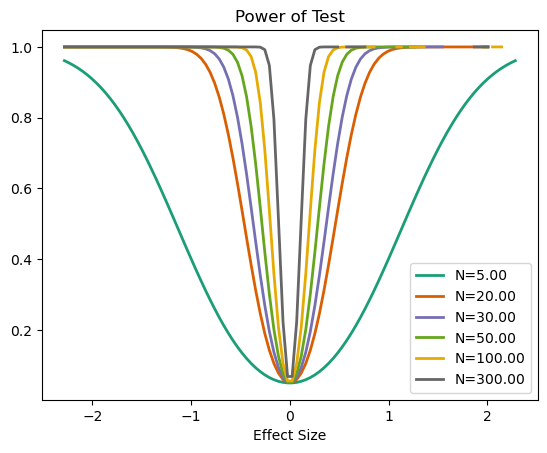

In [20]:
mu_1 = 150 # or 130, it's the same, we just need either the upper or lower limit of the range
mu_0 = 140
effect_size = (mu_1 - mu_0) / np.std(df['serum_sodium']-140, ddof=1)

print(effect_size)

test.plot_power(
    dep_var="effect_size",
    nobs=[5,20,30,50,100,300],
    effect_size=np.linspace(-effect_size, effect_size, 100), # sampling 100 points from (-effect size) to (+effect_size)
    alpha=0.05,
    alternative='two-sided',
);

The power increases with the sample size. What if want to find the minimum sample size to achieve a certain power with a certin *effect_size* (i.e. value of $\mu$) ?

Example: *What is the minimum number of observations necessary to achieve 98% of power at $\mu=145$ in the previous test?*

In [21]:
from math import ceil

mu_1 = 145
effect_size = (mu_1-140)/np.std(df['serum_sodium']-140, ddof=1)

n = test.solve_power(
    nobs=None, # setting this to None makes the function solve for this
    effect_size=effect_size,
    alpha=0.05,
    alternative='two-sided',
    power=0.98 # required power
)
print('Minimum n to get 98% of power for mu=145 is', ceil(n)) # ceil rounds always to the larger nearest integer, i.e. 14.2 -> 15

Minimum n to get 98% of power for mu=145 is 15


To have a power of at least 98% at mu = 145, we need at least 15 observations

## Power estimation for non-parametric tests

It is not possible to compute the power of the Wilcoxon signed-rank test using the *statsmodels* library.
There are no readily available functions to calculate the power of non-parametric tests like the Wilcoxon signed-rank test.
However, we can conduct a simulation study to estimate the power (also called Monte Carlo method).

We will simulate data under the alternative hypothesis and calculate the proportion of times we reject the null hypothesis.
This will give us an estimate of the power.

In [22]:
n_simulations = 1000 # number of simulations
n_samples = 10  # number of samples
mu_1 = 144 # mean under the alternative hypothesis

power_estimates = []
for _ in range(n_simulations):
  # Resample directly from the data (no assumption about distribution) shifting their mean
  simulated_data = np.random.choice(df['serum_sodium'], size=n_samples, replace=True) + (mu_1 - df['serum_sodium'].mean())

  # Or you can sample from a certain distribution if you can make assumption about it
  #simulated_data = np.random.normal(loc=mu_1, scale=np.std(df['serum_sodium']), size=n_samples)

  res_wilcoxon = st.wilcoxon(simulated_data - 140, alternative='two-sided')

  # if the p-value is less than 0.05 (alpha), we reject the null hypothesis
  if res_wilcoxon.pvalue < 0.05:
    power_estimates.append(1)
  else:
    power_estimates.append(0)

# The power estimate is the proportion of simulations where we rejected the null hypothesis
power_estimate = np.mean(power_estimates)

print(f"Estimated power of the Wilcoxon signed-rank test: {power_estimate}")

Estimated power of the Wilcoxon signed-rank test: 0.71


# Mean 2 population

Example: *Check if the patients who died during follow-up and those who survived has the same mean of serum_sodium*

To test difference between the mean of two independent samples, with alternative hypothesis such as $\mu_1 > \mu_2$ or $\mu_1 \neq \mu_2$ or $\mu_1 - \mu_2 > 2 $ ecc, a t-test for two samples can be used. It requires the two populations to be both normal and their variance to be equal.

We have already checked that our populations can be both assumed gaussian. Can we assume they have the same variance too? Let's test this

## Variance comparison test

There are multiple tests to compare variances. The parametric F-test is not directly implemented in Python libraries, while there are non-parametric alternatives such as Bertlett's and Levene's tests that are already implemented. Levene's test works well even with non-normal data.

$H_0: \sigma_1^2 = \sigma_2^2$ vs $H_1: \sigma_1^2 \neq \sigma_2^2$

In [23]:
dead = df[df.DEATH_EVENT]
survived = df[~df.DEATH_EVENT]

In [24]:
from scipy.stats import levene

_, p_value = levene(dead['serum_sodium'], survived['serum_sodium'])

print(f"p-value: {p_value}")

p-value: 0.9686051734506648


High p-value, we can assume they have same variance

## t-Test

Now we can apply the two-samples t-test

$H_0: \mu_1 = \mu_2$ vs $H_1: \mu_1 \neq \mu_2$

In [25]:
from scipy.stats import ttest_ind

ttest_ind(dead['serum_sodium'], survived['serum_sodium'], equal_var=True, alternative='two-sided')

TtestResult(statistic=np.float64(0.3813032207957677), pvalue=np.float64(0.7032508919963735), df=np.float64(297.0))

High p-value, we cannot say there is evidence to state that the two groups have different means of serum sodium

N.B. If from the variance test it results that you can say that the variances are different, you can still use the *ttest_ind* function with *equal_var=False*.
In this case a modified version of the t-test is performed (*Welch's t-test*, an approximate test for which $n_1$ and $n_2$ should be both > 5 ).

## Non-parametric version

The 2 samples t-test can be still used for non-gaussian data if the sample sizes are large ($n_1 > 30, n_2 > 30$). There are non-parametric alternatives for small samples sizes but that might also be preferred to the t-test in case of non-gaussian data whose shape of the distribution is not symmetric and/or with many outliers.

A non-parametric test cannot compare the means of the distributions.

The Mann-Whitney U test compares the two distributions. In the two-sided version the hyphothesis are:

$H_0:$ the two populations have the same distribution

vs

$H_1:$ the two populations have different distributions


If the distributions have similar shape, this can be seen as a comparison of *medians* (equal vs different).

In the right-tailed test (alternative="greater")
$H_1:$ the distribution of the first group is stocastically larger than the one of group 2, i.e. it tends to have larger values (or equivalently $F_1(x) < F_2(x)$)

In the left-tailed test (alternative="less") it is the opposite

In [26]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(dead['serum_sodium'], survived['serum_sodium'], alternative='two-sided')

p_value # in this case the null hypotheses should not be rejected

np.float64(0.6814684392620819)

## t C.I. 2 pops

Example: *Compute a 95% bilateral C.I. for the difference between the mean of serum sodium of patients who survived and patients who died during follow-up*

We have already checked that our populations can be both assumed gaussian and can be assumed to have the same variance

In [27]:
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(dead['serum_sodium']), sms.DescrStatsW(survived['serum_sodium']))
res = cm.tconfint_diff(usevar='pooled', alpha=0.05) # if the variance is equal usevar='pooled'
print(res)

(np.float64(-0.8621736570773231), np.float64(1.2765603377210248))


If we couldn't say that variances are equal:

In [28]:
res_2 = cm.tconfint_diff(usevar='unequal', alpha=0.05)
print(res_2)

(np.float64(-0.8668463413734224), np.float64(1.2812330220171242))


In [29]:
print('Width with equal variance assumption:', res[1] - res[0])
print('Width without equal variance assumption:', res_2[1] - res_2[0])

Width with equal variance assumption: 2.138733994798348
Width without equal variance assumption: 2.1480793633905466


## Non-parametric CI

The usual t CI relies on approximate normality of the mean (via CLT). With small n and skewed data, that CI may be misleading. In this situation, a better approximation are CI obtained via bootstraping

In [30]:
def bootstrap_ci_mean_diff(x, y, n_boot=5000, alpha=0.05, random_state=None):
    """
    Percentile bootstrap CI for the difference in means: mean(x) - mean(y).
    x, y: array-like (will drop NaNs)
    n_boot: number of bootstrap samples
    alpha: confidence level
    random_state: random state for reproducibility
    return: (lower_bound, upper_bound)
    """
    rng = np.random.default_rng(random_state)
    x = np.array(x) # allows indexing with a list of indexes
    y = np.array(y)
    diffs = []

    nx, ny = len(x), len(y)
    for b in range(n_boot):
        xb = x[rng.integers(0, nx, nx)]  # resample x with replacement
        yb = y[rng.integers(0, ny, ny)]  # resample y with replacement
        diffs.append(xb.mean() - yb.mean())

    lo, hi = np.percentile(diffs, [100*alpha/2, 100*(1-alpha/2)])
    return (lo, hi)

In [31]:
ci = bootstrap_ci_mean_diff(dead['serum_sodium'], survived['serum_sodium'], n_boot=5000, alpha=0.05, random_state=42)
print(f"Bootstrap mean diff 95% CI: {ci[0]:.4f}, {ci[1]:.4f}")

Bootstrap mean diff 95% CI: -0.8525, 1.2618


Try to implement the same for 1 population

# Proportion test

Example: *Check if probability of smoking is > 0.30 for hf patients*

Proportion test verifies hypothesis on $p$ of a Bernoulli distribution. There are multiple ways to perform it, the simplest one is using a z-test. This is an approximate test, considered valid if $ n > 30$, $n \cdot p_0 > 5$ and $ n \cdot (1 - p_0) > 5$

$p_0=30$

$H_0: p \leq 0.30 $ vs $H_1: p > 0.30$

In [32]:
from statsmodels.stats.proportion import proportions_ztest

count = df['smoking'].sum() # number of positive instances (required by the proportions_ztest function)
nobs = len(df)

# our threshold value between H0 and H1
p0 = 0.30

# verify assumptions
assert(nobs > 30)
assert(nobs * p0 > 5)
assert(nobs * (1-p0) > 5)

stat, pval = proportions_ztest(count, nobs, value=p0, alternative='larger')
print(pval)

0.2175908200563178


Large p-value --> there is not enough evidence to state this, despite the point estimate of 0.32:

In [33]:
count/nobs

np.float64(0.3210702341137124)

## Proportion C.I.

Example: *Compute a 90% C.I. for the probability  that an HF patients is a smoker*

Similarly to hypothesis testing, we use a Z interval which works under assumptions similar to those of the z-test for proportions

($n > 30, n\hat{p} > 5, n(1-\hat{p}) > 5$)

where $\hat{p}$ is the sample mean for a proportion

Bilateral proportion C.I. formula:

$ \hat{p} \pm z_{\frac{\alpha}{2}} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $

In [34]:
from statsmodels.stats.proportion import proportion_confint

count = df['smoking'].sum() # number of positive istances (required by the proportion_confint function)
nobs = len(df)

# our threshold value between H0 and H1
p_hat = count/nobs

# verify assumptions
assert(nobs > 30)
assert(nobs * p_hat > 5)
assert(nobs * (1-p_hat)) > 5

proportion_confint(count, nobs, alpha=0.10) # unilateral proportion_confint will be available in the next release of statsmodel

(0.2766578476991803, 0.3654826205282445)

What if we want the unilateral interval? For proportions, statsmodel proportiona_confint does not support yet unilateral intervals (implemented from version 0.15.0 of statsmodels, not yet available on Colab)

We need to compute it from scratch

Unilateral right proportion C.I. formula:

$ \hat{p} - z_{\alpha} \cdot \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $

In [35]:
from scipy.stats import norm

count = df['smoking'].sum()
nobs = len(df)
p_hat = count / nobs

alpha = 0.10  # 90% confidence level
z_alpha = norm.ppf(1 - alpha)  # the quantile z_alpha, who leaves at its left (1-alpha)%

lower_bound = p_hat - z_alpha * ( (p_hat * (1 - p_hat) / nobs) ** 0.5)

print(f"90% Right Unilateral Confidence Interval: ({lower_bound}, +inf)")

90% Right Unilateral Confidence Interval: (0.2864672989913919, +inf)


# Chi-square independence test

This is a non-parametric test to verify independency between two categorical variables

$H_0$: X and Y are independent vs $H_1$: X and Y are not independent

Example: *verify if it possible to state that gender and diabetes are not independent*

In [36]:
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df['sex'], df['diabetes']) # the chi2_contingency function requires this contigency table
print('Contigency Table:\n')
print(cont_table)

Contigency Table:

diabetes    0   1
sex              
Female     50  55
Male      124  70


In [37]:
res = chi2_contingency(cont_table)
print(f"\n\nThe p-value is {res.pvalue}")



The p-value is 0.009198613019784425


We can affirm that gender and diabetes are not independent

Example: *verify if it possible to state that smoking and diabetes are not independent*

In [38]:
cont_table = pd.crosstab(df['smoking'], df['diabetes'])
chi2_contingency(cont_table).pvalue

np.float64(0.01555029458448228)

Less evidence, but we can still say that they are not independent

Example: *verify if it possible to state that gender and hypertension are not independent*

In [39]:
cont_table = pd.crosstab(df['sex'], df['high_blood_pressure'])
chi2_contingency(cont_table).pvalue

np.float64(0.09255933962243283)

We cannot state that gender and hypertension are not independent

# Feedback

Please leave a feedback on this lab through [this form](https://forms.office.com/Pages/ResponsePage.aspx?id=K3EXCvNtXUKAjjCd8ope62ERUe-TSadLmsjRWyhHdW1UN1JHN0kyVkpaQkJZTVAzMlpFNTJPR01KWC4u) (estimated 2 minutes)